The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

*very hard to understand slozhniy informeish in english*

# Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import calendar

In [3]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights.csv")

А какие данные у нас вообще есть?

In [4]:
pd.set_option('display.max_columns', None)

airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Глянем пропущенное

In [7]:
missing_data = airports.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(airports)) * 100
display(missing_data)

,Пропущенные значения,% от общего
IATA_CODE,0,0.000000
AIRPORT,0,0.000000
CITY,0,0.000000
STATE,0,0.000000
COUNTRY,0,0.000000
LATITUDE,3,0.931677
LONGITUDE,3,0.931677


In [8]:
missing_data = airlines.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(airlines)) * 100
display(missing_data)

,Пропущенные значения,% от общего
IATA_CODE,0,0.0
AIRLINE,0,0.0


In [9]:
missing_data = flights.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(flights)) * 100
display(missing_data)

,Пропущенные значения,% от общего
YEAR,0,0.000000
MONTH,0,0.000000
DAY,0,0.000000
DAY_OF_WEEK,0,0.000000
AIRLINE,0,0.000000
FLIGHT_NUMBER,0,0.000000
TAIL_NUMBER,326,0.196571
ORIGIN_AIRPORT,0,0.000000
DESTINATION_AIRPORT,0,0.000000
SCHEDULED_DEPARTURE,0,0.000000


Выкинем столбцы с кучей пропущенных и строки, где пропущено время задержки вылета и задержки прилета

In [61]:
columns_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
target_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY']
total_rows = len(flights)
cleaned = flights.dropna(subset=target_columns)
cleaned_rows = len(cleaned)
percent_removed = ((total_rows - cleaned_rows) / total_rows) * 100
print(f"Процент удаленных строк: {percent_removed:.2f}%")

Процент удаленных строк: 1.81%


Только положительные задержки берем *(ну улетели раньше и улетели)*

In [67]:
filtered_flights = flights[
    (flights['DEPARTURE_DELAY'].notna()) &
    (flights['ARRIVAL_DELAY'].notna()) &
    (flights['DEPARTURE_DELAY'] >= 0) &
    (flights['ARRIVAL_DELAY'] >= 0)
]

# Основной код

## 1. Задержки по авиакомпаниям

Найдем топ авиакомпаний, которые задерживают вылет

<ipython-input-65-f75d6df944c6>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




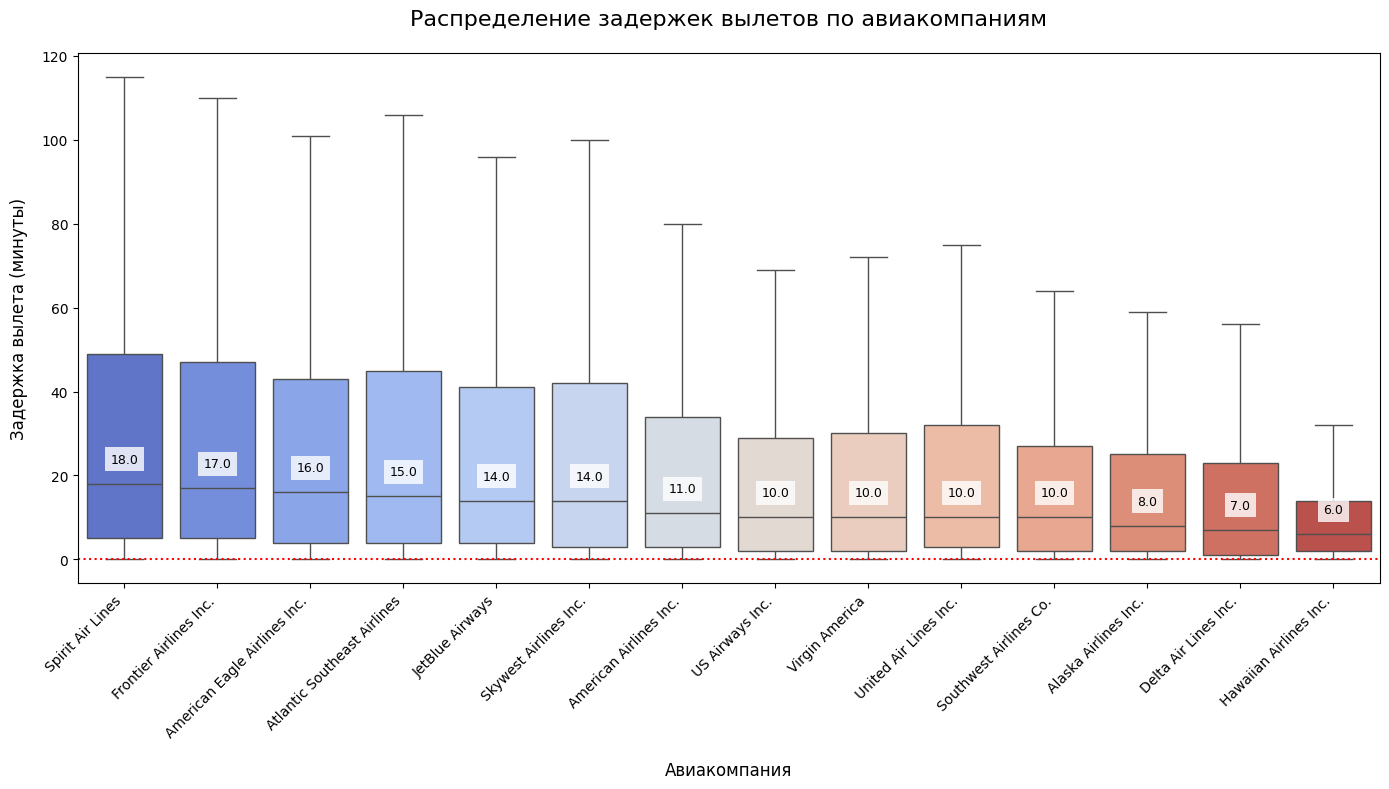

In [65]:
flights_with_names = pd.merge(
    flights[['AIRLINE', 'DEPARTURE_DELAY']],
    airlines,
    left_on='AIRLINE',
    right_on='IATA_CODE',
    how='left'
)

filtered_data = flights_with_names[
    (flights_with_names['DEPARTURE_DELAY'] >= 0) &
    (flights_with_names['DEPARTURE_DELAY'].notna())
]

median_delays = filtered_data.groupby('AIRLINE_x')['DEPARTURE_DELAY'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

sns.boxplot(
    x='AIRLINE_x',
    y='DEPARTURE_DELAY',
    data=filtered_data,
    #hue='AIRLINE_x', (с этой штукой порядок окрашивания сбивается, как пофиксить не поняла, пусть будет с предупреждением)
    palette='coolwarm',
    showfliers=False,
    order=median_delays.index,
)

airline_name_map = dict(zip(airlines['IATA_CODE'], airlines['AIRLINE']))

xtick_labels = [airline_name_map.get(code, code) for code in median_delays.index]

plt.xticks(
    ticks=range(len(median_delays)),
    labels=xtick_labels,
    rotation=45,
    ha='right',
    fontsize=10
)

for i, (code, value) in enumerate(median_delays.items()):
    plt.text(i, value+5, f"{value:.1f}",
             ha='center',
             fontsize=9,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Распределение задержек вылетов по авиакомпаниям',
          pad=20, fontsize=16)
plt.xlabel('Авиакомпания', labelpad=15, fontsize=12)
plt.ylabel('Задержка вылета (минуты)', labelpad=10, fontsize=12)
plt.axhline(y=0, color='red', linestyle=':', linewidth=1.5)

plt.tight_layout()
plt.show()

У пяти авиакомпаний: American Eagle Airlines Inc, Frontier Airlines Inc, Spirit Air Lines, Skywest Airlines Inc и Atlantic Southeast Airlines средняя задержка времени вылета составляет 20 и более минут. Рекомендуется отправить этим компаниям уведомление о проблемах, чтобы они выяснили причины настолько длительных задержек.

## 2. Зависимость задержек от аэропорта отправления и аэропорта прибытия

Построим матрицу, где по вертикали будут аэропорты вылета, по горизонтали - аэропорты прибытия. Для каждой ячейки (каждой пары аэропорт отправления + аэропорт прибытия) посчитаем среднее время задержки вылета.

Размер матрицы большой - если хочется посмотреть на конкретную ячейку, следует выделить кусок матрицы, чтобы измерить масштаб.

In [22]:
all_airports = sorted(list(set(flights['ORIGIN_AIRPORT'].unique()) | set(flights['DESTINATION_AIRPORT'].unique())))

positive_delays = flights[flights['DEPARTURE_DELAY'] > 0]

full_matrix = pd.DataFrame(
    index=all_airports,
    columns=all_airports
)

delays = positive_delays.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['DEPARTURE_DELAY'].mean().unstack()
full_matrix = full_matrix.fillna(delays)

np.fill_diagonal(full_matrix.values, np.nan)

fig = px.imshow(
    full_matrix,
    x=all_airports,
    y=all_airports,
    color_continuous_scale='YlOrRd',
    title='Средняя задержка вылета между аэропортами',
    labels={
        'x': 'Аэропорт назначения',
        'y': 'Аэропорт вылета',
        'color': 'Средняя задержка (мин)'
    },
    zmin=0
)

fig.update_layout(
    width=800,
    height=800,
    xaxis_title='Аэропорт назначения',
    yaxis_title='Аэропорт вылета',
    coloraxis_colorbar_title='Задержка (мин)',
    xaxis=dict(tickangle=90, tickfont=dict(size=8)),
    yaxis=dict(tickfont=dict(size=8))
)

fig.show()


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:44: RuntimeWarning:

invalid value encountered in reduce



В таблице видны проблемные участки - например, по маршруту PIH-SLC среднее время задержки составляет аж 304.5 минуты, вылеты из аэропорта ORD задерживают практически по всем направлениям более чем на час. Рекомендуется отправить аэропортам с большим количеством задержек по различным направлениям (как аэропортам вылета, так и аэропортам отправления) уведомления о неэффективности их работы, а также рассмотреть самые проблемные (клетки красного цвета) направления и направить информацию аэропортам отправления-прибытия, чтобы они оптимизировали свое взаимодействие.

## 3. Зависимость задержки прибытия от задержки вылета

Было бы логично, если бы задержка прибытия линейно (y=x) зависела от задержки отправления. Проверим это утверждение

<ipython-input-66-ec000593e306>:29: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



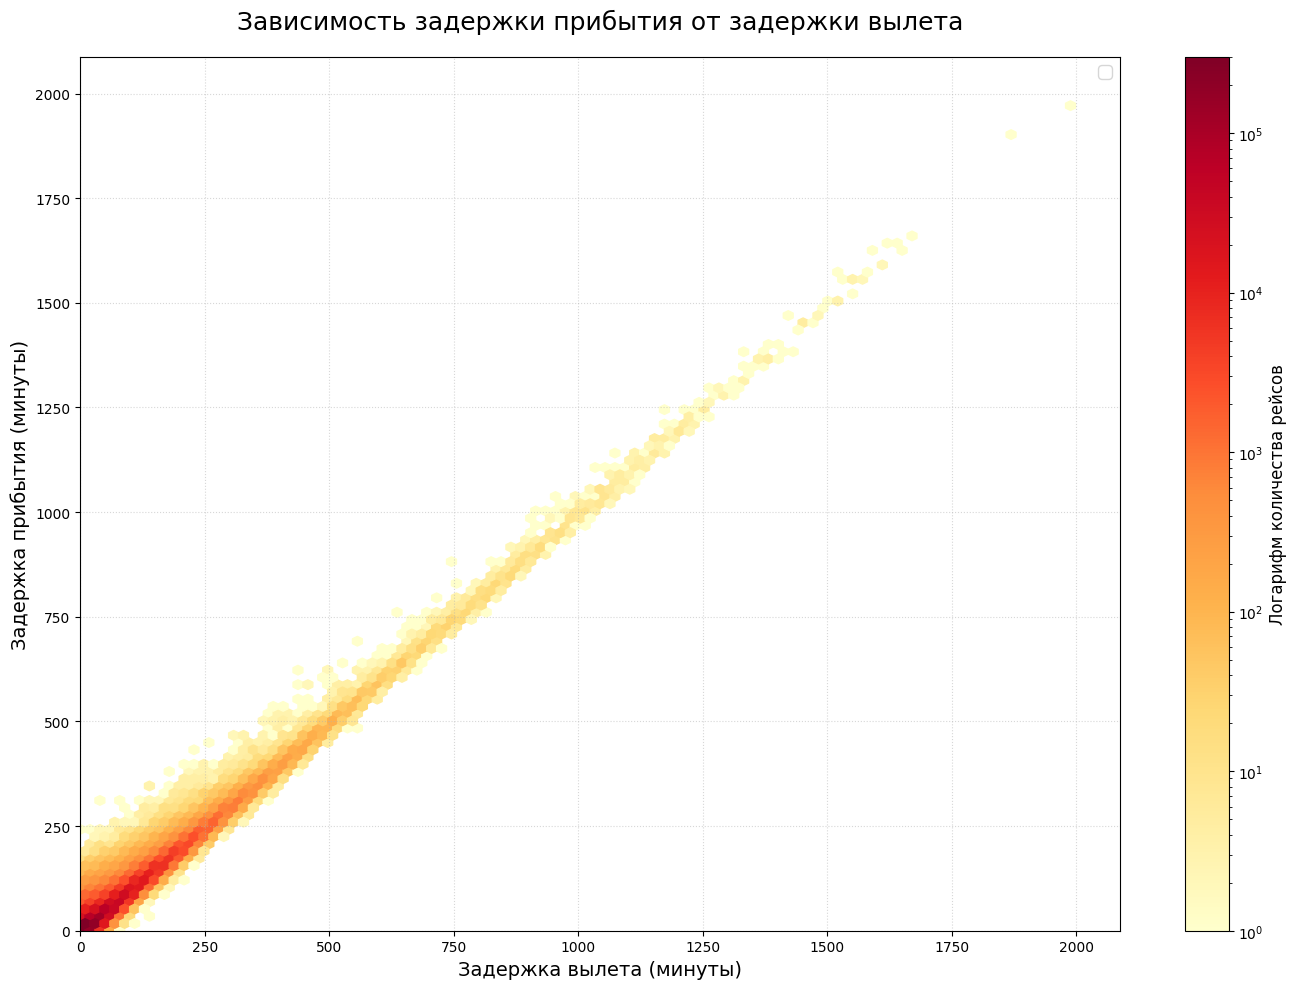

In [66]:
plt.figure(figsize=(14, 10))

hexbin = plt.hexbin(
    x=filtered_flights['DEPARTURE_DELAY'],
    y=filtered_flights['ARRIVAL_DELAY'],
    gridsize=100,
    cmap='YlOrRd',
    mincnt=1,
    bins='log'
)

max_delay = max(
    filtered_flights['DEPARTURE_DELAY'].max(),
    filtered_flights['ARRIVAL_DELAY'].max()
) * 1.05  # +5%

plt.title('Зависимость задержки прибытия от задержки вылета',
          fontsize=18, pad=20)
plt.xlabel('Задержка вылета (минуты)', fontsize=14)
plt.ylabel('Задержка прибытия (минуты)', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)

cb = plt.colorbar(hexbin)
cb.set_label('Логарифм количества рейсов', fontsize=12)

plt.xlim(0, max_delay)
plt.ylim(0, max_delay)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 4. Зависимость от месяца и дня

Найдем "проблемные" месяцы, среднее время задержки рейсов в течение которых больше, чем в течение остальных

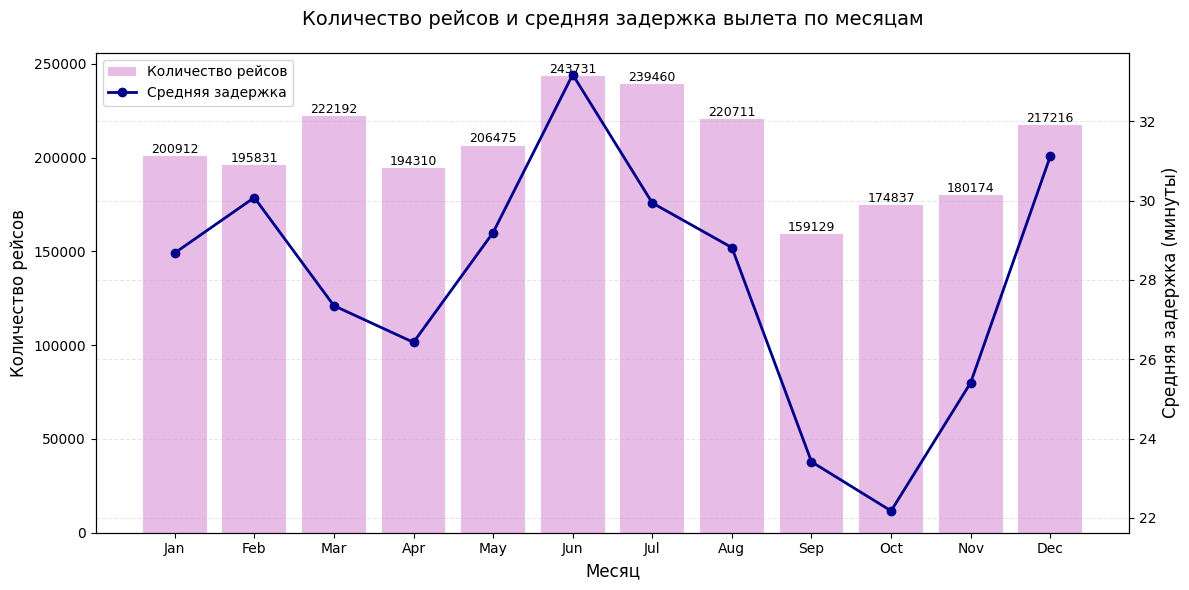

In [56]:
flights_positive = flights[flights['DEPARTURE_DELAY'] >= 0].copy()

flights_positive.loc[:, 'MONTH_NAME'] = flights_positive['MONTH'].apply(lambda x: calendar.month_abbr[x])

monthly_stats = flights_positive.groupby(['MONTH', 'MONTH_NAME'], as_index=False).agg(
    TOTAL_FLIGHTS=('FLIGHT_NUMBER', 'count'),
    AVG_DELAY=('DEPARTURE_DELAY', 'mean')
).sort_values('MONTH')

plt.figure(figsize=(12, 6))
ax1 = plt.gca()

bars = ax1.bar(
    monthly_stats['MONTH_NAME'],
    monthly_stats['TOTAL_FLIGHTS'],
    color='plum',
    alpha=0.7,
    label='Количество рейсов'
)

ax1.set_xlabel('Месяц', fontsize=12)
ax1.set_ylabel('Количество рейсов', fontsize=12)

ax2 = ax1.twinx()
line, = ax2.plot(
    monthly_stats['MONTH_NAME'],
    monthly_stats['AVG_DELAY'],
    color='darkblue',
    marker='o',
    linewidth=2,
    label='Средняя задержка'
)

ax2.set_ylabel('Средняя задержка (минуты)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.title('Количество рейсов и средняя задержка вылета по месяцам',
          fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)

ax1.legend([bars, line], ['Количество рейсов', 'Средняя задержка'], loc='upper left')

plt.tight_layout()
plt.show()

По графику видно, что самое больше всего самолеты задерживают в июне - в тот же месяц, на который приходится пик количества полетов. Думаю, что задержки в июне связаны с недостаточностью материального обеспечения аэропортов - мощности не расчитаны на такой большой поток людей. Можно, например, увеличивать стоимость авиабилетов в июне и снижать ее в сентябре-октябре, чтобы сбалансировать количество путешествующих.

Хочется посмотреть, как распределяется среднее время задержки отправления рейса по дням в течение месяца

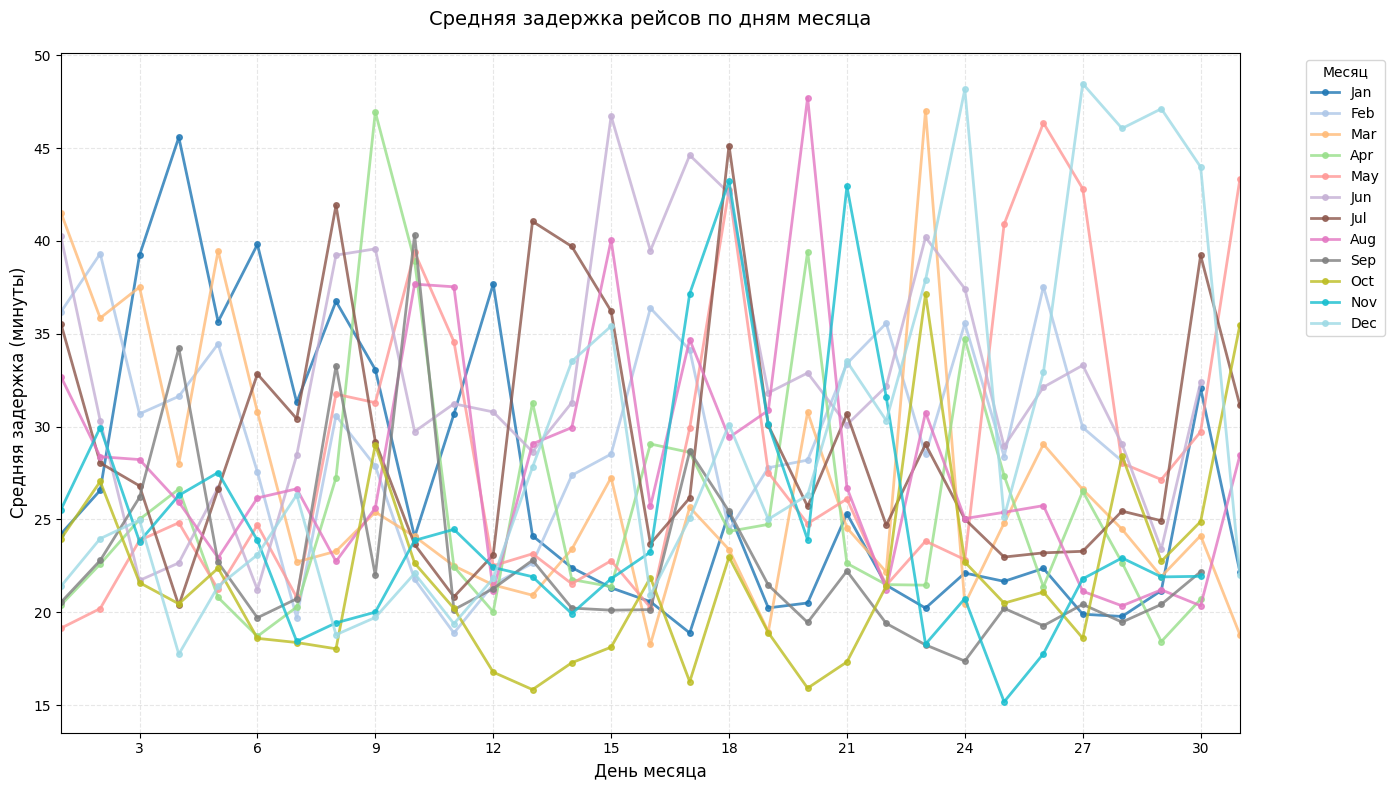

In [60]:
daily_delays = flights_positive.groupby(['MONTH', 'MONTH_NAME', 'DAY'])['DEPARTURE_DELAY'].mean().reset_index()

plt.figure(figsize=(14, 8))

colors = plt.cm.tab20(np.linspace(0, 1, 12))

for month in range(1, 13):
    month_data = daily_delays[daily_delays['MONTH'] == month]
    plt.plot(
        month_data['DAY'],
        month_data['DEPARTURE_DELAY'],
        marker='o',
        markersize=4,
        linewidth=2,
        alpha=0.8,
        color=colors[month-1],
        label=calendar.month_abbr[month]
    )

plt.xlabel('День месяца', fontsize=12)
plt.ylabel('Средняя задержка (минуты)', fontsize=12)
plt.title('Средняя задержка рейсов по дням месяца', fontsize=14, pad=20)
plt.xticks(range(1, 32))
plt.xlim(1, 31)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Только целые числа на оси X

plt.legend(title='Месяц', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Несмотря на то, что в июле рейсы в среднем задерживаются на большее количество времени, по этому графику можно увидеть, что 6 июня рейсы в среднем задерживались на меньшее количество времени, чем в остальные дни. Эта информация может быть полезна для пропорциональной коррекции цен на авиабилеты.

## 5. Зависимость задержки вылета от времени полета

Посмотрим, как влияет время полета на то, на сколько вылет рейса может задержаться.

<ipython-input-74-81f66268d226>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


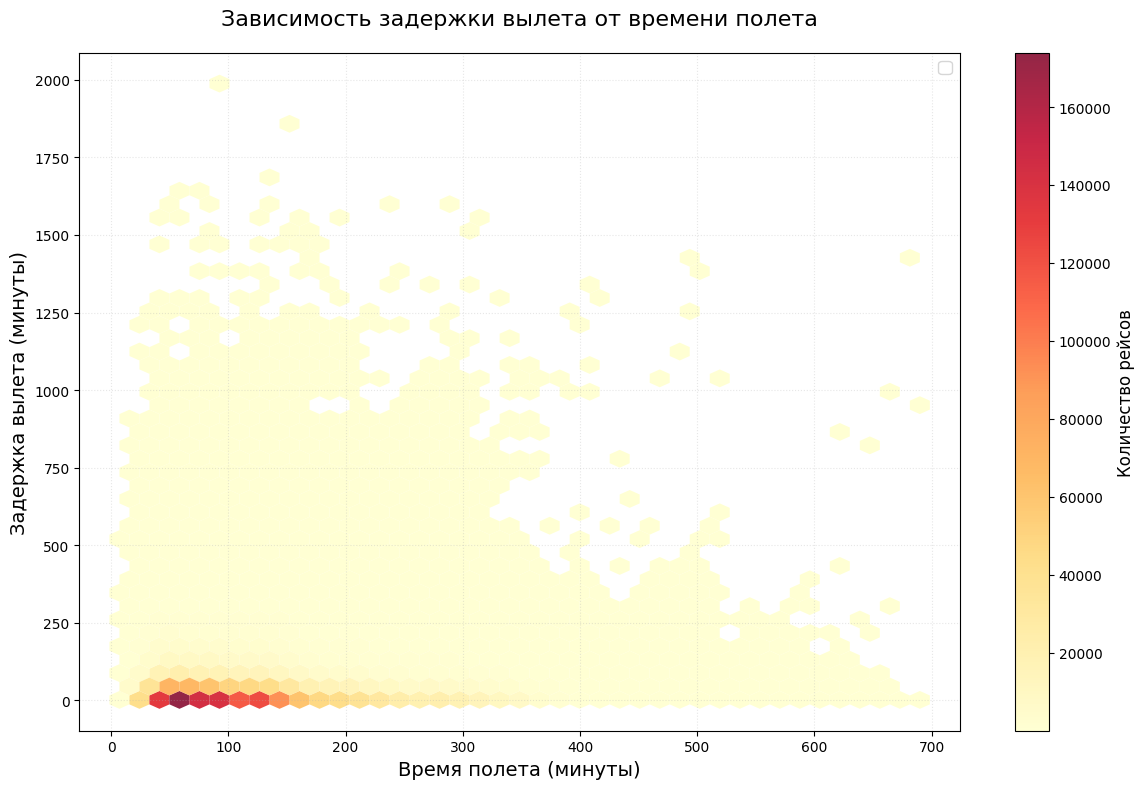

In [74]:
plt.figure(figsize=(12, 8))

hexbin = plt.hexbin(
    x=filtered_flights['AIR_TIME'],
    y=filtered_flights['DEPARTURE_DELAY'],
    gridsize=40,
    cmap='YlOrRd',
    mincnt=1,
    edgecolor='none',
    alpha=0.85
)

plt.title('Зависимость задержки вылета от времени полета', fontsize=16, pad=20)
plt.xlabel('Время полета (минуты)', fontsize=14)
plt.ylabel('Задержка вылета (минуты)', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.3)

cb = plt.colorbar(hexbin)
cb.set_label('Количество рейсов', fontsize=12)

plt.ticklabel_format(style='plain', axis='both')

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

По графику видно, что чем больше проолжительность рейса, тем меньше время задержки вылета (не учитывая единичные выбросы). Возможно это связано с тем, что частая причина задержек вылета коротких рейсов в том, что эти рейсы являются пересадочными, и, соответственно, когда задерживается предыдущий рейс, задерживают следующий. Еще одна версия - возможно, самолеты на длинные рейсы начинают готовить сильно заранее, чтобы успеть проверить правильность функционирования всех систем, а самолеты для выполнения коротких рейсов проходят только короткий профилактический осмотр, на который, тем не менее, тоже нужно заложить время, а закладывают его неправильно.  